In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


# Total Trips

In [6]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,349,644","15,766,214"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,424,385","6,807,631"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.47     36.45      0.00
           survey      3.49     20.99      0.00
HOV2       model       9.59     21.87      2.09
           survey      6.77     17.34      0.20
HOV3+      model       9.87     22.20      2.16
           survey      7.65     18.03      0.36
SOV        model       9.77     22.57      2.04
           survey      8.39     19.83      0.14
School Bus model       4.21     11.97      0.90
           survey      3.91     11.61      0.00
TNC        model       2.38     10.60      0.50
           survey      4.04     15.77      0.05
Transit    model      11.18     44.04      1.52
           survey      7.08     33.61      3.00
Walk       model       0.68     13.67      0.00
           survey      0.78     15.79      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       3.16     21.04      0.00
           survey      1.44      8.64      0.00
HOV2       model       3.30     10.64      0.67
           survey      3.54     11.34      0.07
HOV3+      model       3.44     10.91      0.71
           survey      4.12     12.17      0.01
SOV        model       6.30     16.21      1.32
           survey      6.60     18.22      0.16
School Bus model       3.15     10.44      0.64
           survey      2.83      9.45      0.00
TNC        model       2.37      9.33      0.48
           survey      3.22     15.08      0.18
Transit    model       6.28     37.51      0.37
           survey      4.37     14.30      2.86
Walk       model       1.35     27.10      0.00
           survey      0.81     16.29      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,292,279","3,264,963"
1,"760,875","786,285"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,062","9,796"
Full-Time Worker,"484,883","709,233"
High School Student Age 16+,"128,709","5,549"
Non-Working Adult Age 65+,334,329
Non-Working Adult Age <65,"17,803",NaN
Part-Time Worker,"42,297","44,097"
University Student,"84,787","15,414"


# Auto Ownership

In [13]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"106,290","129,688"
1.0,"486,709","512,273"
2.0,"584,034","624,897"
3+,"428,230","389,654"


## By Income

In [14]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   51,957   22,752   11,338    3,435  16,796
       survey  64,043   27,901   17,279        0  20,465
1.0    model  116,548  106,625   81,733   29,501 152,207
       survey 138,715  102,527  110,953        0 160,079
2.0    model   32,654   59,054   77,840   38,523 375,953
       survey  90,579   85,436   77,247        0 371,635
3.0    model    8,250   16,636   30,722   16,550 225,390
       survey  46,917   19,832   22,998        0 177,643
4+     model    3,311    6,937   11,139    5,815 103,472
       survey   9,063      759   13,427        0  99,015

In [15]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

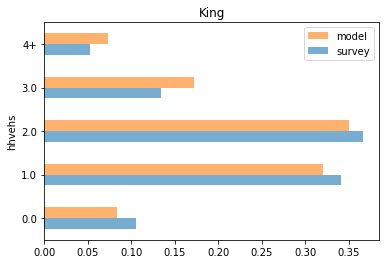

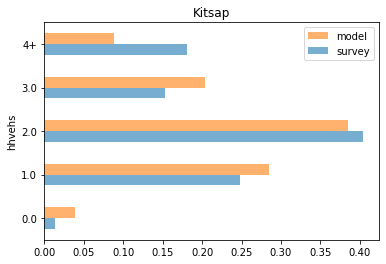

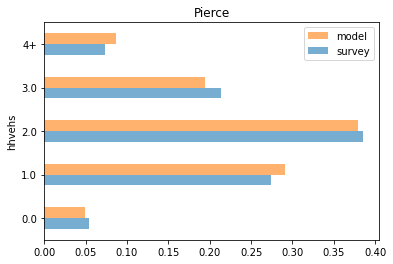

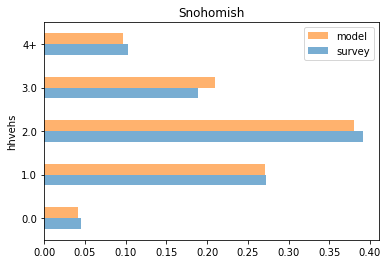

In [16]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [17]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,011,311    330  35,228    43,440
Kitsap         12,995 88,138   8,240       239
Pierce        109,761  6,966 228,649       608
Snohomish     143,610     38     474   229,237